# Maze Experiment Introduction

In this notebook, we will be running the MDP_Model on the Maze problem. This 2D simulation builds on a `gym-maze` package that can be found here: https://github.com/MattChanTK/gym-maze. Before beginning this simulation, please be sure to install the relevant packages on the github **Installation** section (pygame and numpy are also required)!

## Running the Algorithm - Optimal Clustering 5x5

We can generate bigger mazes using the same method as above! Then, we will test to see if the optimal policy found by the maze is the same as the real optimal policy. 

#### Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import gym
import gym_maze

import sys
sys.path.append('/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/')

from model import MDP_model
from maze_functions import createSamples, opt_maze_trajectory, opt_model_trajectory, policy_accuracy, \
    get_maze_transition_reward, plot_paths, value_diff, get_maze_MDP
from MDPtools import SolveMDP
from testing import cluster_size, next_clusters, training_value_error, purity, plot_features, testing_value_error

mazes = {1: 'maze-v0',
         2: 'maze-sample-3x3-v0',
         3: 'maze-random-3x3-v0',
         4: 'maze-sample-5x5-v0',
         5: 'maze-random-5x5-v0',
         6: 'maze-sample-10x10-v0',
         7: 'maze-random-10x10-v0',
         8: 'maze-sample-100x100-v0',
         9: 'maze-random-100x100-v0',
         10: 'maze-random-10x10-plus-v0', # has portals 
         11: 'maze-random-20x20-plus-v0', # has portals 
         12: 'maze-random-30x30-plus-v0'} # has portals 

#### Creating Samples

In [2]:
# Setting Parameters
N = 200
T_max = 25
r = 0.4
maze = mazes[4]

In [3]:
#df = createSamples(N, T_max, maze, r, reseed=True)

# UPDATE with path and filename for dataset you want to use!
path = '/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids_Dropbox/Maze/fitted_Q Comparisons/Datasets/Test 1 (N=200, T_max = 25, randomness=0.4)'
sys.path.append(path)
filename = 'set_5.csv'
df = pd.read_csv(path+'/'+filename)

# taking out extra ID col and changing actions back to integers
df = df.iloc[:, 1:]
df.loc[df['ACTION']=='None', 'ACTION'] = 4
df['ACTION'] = pd.to_numeric(df['ACTION'], downcast='integer')
df.loc[df['ACTION']==4, 'ACTION'] = 'None'

df

,ID,TIME,FEATURE_0,FEATURE_1,ACTION,RISK,OG_CLUSTER
0,0,0,0.162393,-0.906615,1,-0.004,0
1,0,1,0.014351,-0.929129,2,-0.004,0
2,0,2,1.998613,-0.527212,2,-0.004,1
3,0,3,2.717985,-0.460358,0,-0.004,2
4,0,4,2.685645,-0.723460,2,-0.004,2
...,...,...,...,...,...,...,...
4596,199,20,3.827982,-1.149078,2,-0.004,8
4597,199,21,4.467706,-1.203635,0,-0.004,9
4598,199,22,4.176818,-0.214303,1,-0.004,4
4599,199,23,4.617432,-1.512775,3,-0.004,9


That's how the transition data looks like:

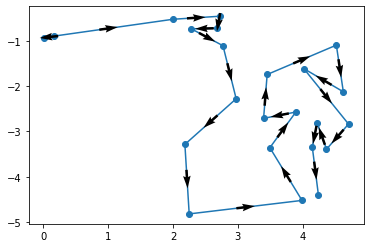

In [4]:
plot_paths(df,1)

Checking how many points actually reach the end: 

In [5]:
df.loc[df['ACTION']=='None']['ID'].count()

126

#### Fitting to Algorithm

Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

Clusters Initialized
     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0     0     0   0.162393  -0.906615      1 -0.004           0        0   
1     0     1   0.014351  -0.929129      2 -0.004           0        0   
2     0     2   1.998613  -0.527212      2 -0.004           1        0   
3     0     3   2.717985  -0.460358      0 -0.004           2        0   
4     0     4   2.685645  -0.723460      2 -0.004           2        0   
..   ..   ...        ...        ...    ...    ...         ...      ...   
220   9    15   4.583712  -1.946514      1 -0.004           9        0   
221   9    16   4.232318  -2.112367      2 -0.004          14        0   
222   9    17   4.774427  -2.011078      1 -0.004          14        0   
223   9    18   4.657869  -3.746103      1 -0.004          19        0   
224   9    19   4.914728  -4.485219   None  1.000          24        1   

    NEXT_CLUSTER  
0              0  
1              0  
2              0  
3             

Splitting... |#Clusters:7:  26%|██▋       | 5/19 [00:02<00:06,  2.16it/s]

Splitting... |#Clusters:8:  32%|███▏      | 6/19 [00:02<00:06,  2.02it/s]

Splitting... |#Clusters:9:  37%|███▋      | 7/19 [00:03<00:06,  1.91it/s]

Splitting... |#Clusters:10:  42%|████▏     | 8/19 [00:03<00:06,  1.80it/s]

Splitting... |#Clusters:11:  47%|████▋     | 9/19 [00:05<00:07,  1.34it/s]

Splitting... |#Clusters:12:  53%|█████▎    | 10/19 [00:06<00:07,  1.15it/s]

Splitting... |#Clusters:13:  58%|█████▊    | 11/19 [00:07<00:07,  1.12it/s]

Splitting... |#Clusters:14:  63%|██████▎   | 12/19 [00:07<00:05,  1.22it/s]

Splitting... |#Clusters:15:  68%|██████▊   | 13/19 [00:08<00:04,  1.25it/s]

Splitting... |#Clusters:17:  79%|███████▉  | 15/19 [00:10<00:03,  1.31it/s]

Splitting... |#Clusters:18:  89%|████████▉ | 17/19 [00:11<00:01,  1.34it/s]

Splitting... |#Clusters:19:  89%|████████▉ | 17/19 [00:11<00:01,  1.34it/s]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:12<00:00,  1.34it/s]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:13<00:00,  1.38it/s]

Optimal # of clusters reached


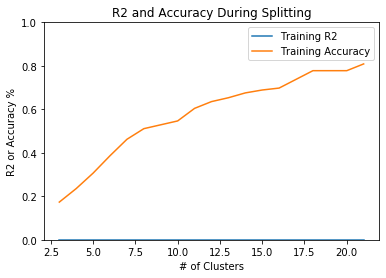

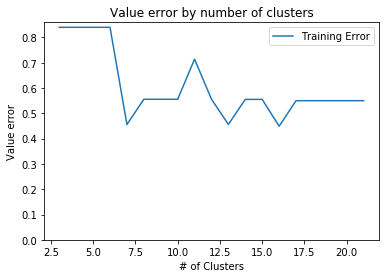

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

N= 10  completed
Clusters Initialized
     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0     0     0   0.162393  -0.906615      1 -0.004           0        0   
1     0     1   0.014351  -0.929129      2 -0.004           0        0   
2     0     2   1.998613  -0.527212      2 -0.004           1        0   
3     0     3   2.717985  -0.460358      0 -0.004           2        0   
4     0     4   2.685645  -0.723460      2 -0.004           2        0   
..   ..   ...        ...        ...    ...    ...         ...      ...   
449  19    14   4.608135  -1.640606      1 -0.004           9        0   
450  19    15   4.270369  -2.490696      2 -0.004          14        0   
451  19    16   4.569233  -2.796362      1 -0.004          14        0   
452  19    17   4.649994  -3.239708      1 -0.004          19        0   
453  19    18   4.031029  -4.718395   None  1.000          24        1   

    NEXT_CLUSTER  
0              0  
1              0  
2              0

Splitting... |#Clusters:14:  63%|██████▎   | 12/19 [00:05<00:03,  2.09it/s]

Splitting... |#Clusters:15:  68%|██████▊   | 13/19 [00:05<00:03,  1.95it/s]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:09<00:00,  1.56it/s]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:10<00:00,  1.80it/s]

Optimal # of clusters reached


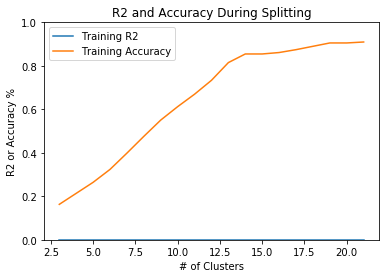

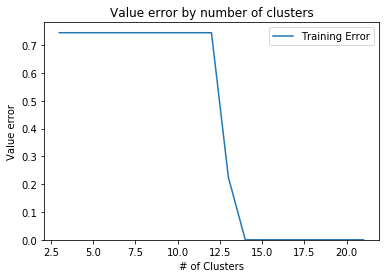

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

N= 20  completed
Clusters Initialized
     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0     0     0   0.162393  -0.906615      1 -0.004           0        0   
1     0     1   0.014351  -0.929129      2 -0.004           0        0   
2     0     2   1.998613  -0.527212      2 -0.004           1        0   
3     0     3   2.717985  -0.460358      0 -0.004           2        0   
4     0     4   2.685645  -0.723460      2 -0.004           2        0   
..   ..   ...        ...        ...    ...    ...         ...      ...   
687  29    21   4.703516  -1.872763      1 -0.004           9        0   
688  29    22   4.996635  -2.389144      1 -0.004          14        0   
689  29    23   4.321912  -3.033009      2 -0.004          19        0   
690  29    24   4.051982  -3.177089      1 -0.004          19        0   
691  29    25   4.993659  -4.099437   None  1.000          24        1   

    NEXT_CLUSTER  
0              0  
1              0  
2              0

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:14<00:00,  1.28it/s]

Optimal # of clusters reached


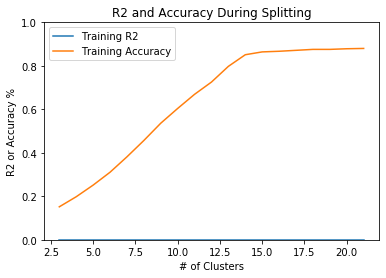

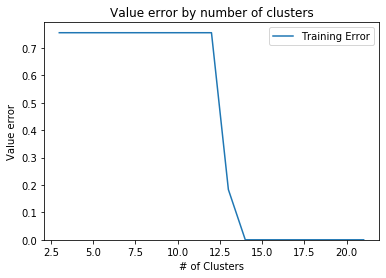

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

N= 30  completed
Clusters Initialized
     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0     0     0   0.162393  -0.906615      1 -0.004           0        0   
1     0     1   0.014351  -0.929129      2 -0.004           0        0   
2     0     2   1.998613  -0.527212      2 -0.004           1        0   
3     0     3   2.717985  -0.460358      0 -0.004           2        0   
4     0     4   2.685645  -0.723460      2 -0.004           2        0   
..   ..   ...        ...        ...    ...    ...         ...      ...   
911  39    19   4.972711  -2.509315      0 -0.004          14        0   
912  39    20   4.519940  -1.286788      1 -0.004           9        0   
913  39    21   4.462408  -2.353256      1 -0.004          14        0   
914  39    22   4.682941  -3.763786      1 -0.004          19        0   
915  39    23   4.365282  -4.237912   None  1.000          24        1   

    NEXT_CLUSTER  
0              0  
1              0  
2              0

Splitting... |#Clusters:14:  63%|██████▎   | 12/19 [00:10<00:06,  1.02it/s]

Splitting... |#Clusters:15:  68%|██████▊   | 13/19 [00:11<00:06,  1.03s/it]

Splitting... |#Clusters:16:  74%|███████▎  | 14/19 [00:12<00:05,  1.06s/it]

Splitting... |#Clusters:17:  79%|███████▉  | 15/19 [00:13<00:04,  1.12s/it]

Splitting... |#Clusters:18:  84%|████████▍ | 16/19 [00:15<00:03,  1.18s/it]

Splitting... |#Clusters:19:  89%|████████▉ | 17/19 [00:16<00:02,  1.24s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:17<00:01,  1.26s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:19<00:01,  1.08s/it]

Optimal # of clusters reached


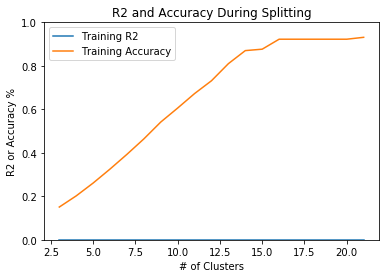

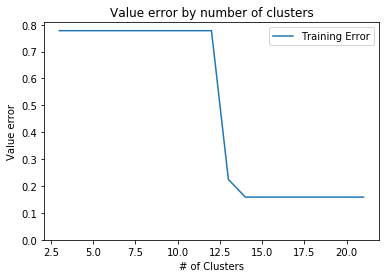

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

N= 40  completed
Clusters Initialized
      ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0      0     0   0.162393  -0.906615      1 -0.004           0        0   
1      0     1   0.014351  -0.929129      2 -0.004           0        0   
2      0     2   1.998613  -0.527212      2 -0.004           1        0   
3      0     3   2.717985  -0.460358      0 -0.004           2        0   
4      0     4   2.685645  -0.723460      2 -0.004           2        0   
...   ..   ...        ...        ...    ...    ...         ...      ...   
1149  49    20   4.946530  -2.144189      0 -0.004          14        0   
1150  49    21   4.113566  -1.523005      2 -0.004           9        0   
1151  49    22   4.325670  -1.650414      2 -0.004           9        0   
1152  49    23   4.878115  -1.613628      1 -0.004           9        0   
1153  49    24   4.084933  -2.079520      3 -0.004          14        0   

     NEXT_CLUSTER  
0               0  
1               0  
2

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:23<00:01,  1.29s/it]

Optimal # of clusters reached


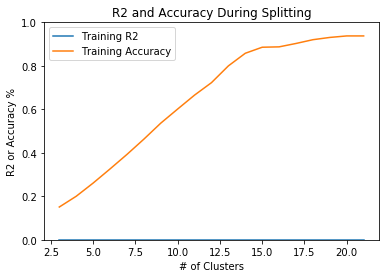

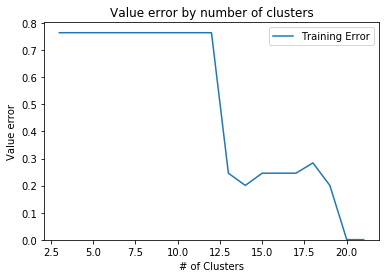

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

N= 50  completed
Clusters Initialized
      ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0      0     0   0.162393  -0.906615      1 -0.004           0        0   
1      0     1   0.014351  -0.929129      2 -0.004           0        0   
2      0     2   1.998613  -0.527212      2 -0.004           1        0   
3      0     3   2.717985  -0.460358      0 -0.004           2        0   
4      0     4   2.685645  -0.723460      2 -0.004           2        0   
...   ..   ...        ...        ...    ...    ...         ...      ...   
1609  69    20   3.180214  -2.853885      1 -0.004          13        0   
1610  69    21   3.278391  -3.705637      3 -0.004          18        0   
1611  69    22   3.558679  -3.098131      1 -0.004          18        0   
1612  69    23   3.951837  -4.111689      0 -0.004          23        0   
1613  69    24   3.465222  -3.961358      0 -0.004          18        0   

     NEXT_CLUSTER  
0               0  
1               0  
2

Splitting... |#Clusters:16:  74%|███████▎  | 14/19 [00:21<00:08,  1.77s/it]

Splitting... |#Clusters:17:  79%|███████▉  | 15/19 [00:23<00:07,  1.95s/it]

Splitting... |#Clusters:18:  84%|████████▍ | 16/19 [00:26<00:06,  2.18s/it]

Splitting... |#Clusters:19:  89%|████████▉ | 17/19 [00:29<00:05,  2.54s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:32<00:02,  2.77s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:37<00:02,  2.10s/it]

Optimal # of clusters reached


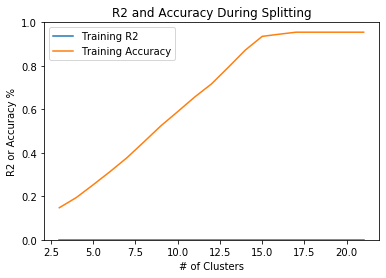

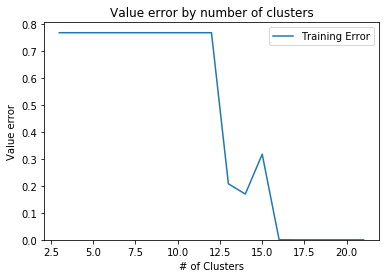

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

N= 70  completed
Clusters Initialized
      ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0      0     0   0.162393  -0.906615      1 -0.004           0        0   
1      0     1   0.014351  -0.929129      2 -0.004           0        0   
2      0     2   1.998613  -0.527212      2 -0.004           1        0   
3      0     3   2.717985  -0.460358      0 -0.004           2        0   
4      0     4   2.685645  -0.723460      2 -0.004           2        0   
...   ..   ...        ...        ...    ...    ...         ...      ...   
2072  89    16   4.699941  -1.931389      1 -0.004           9        0   
2073  89    17   4.724115  -2.513740      1 -0.004          14        0   
2074  89    18   4.225919  -3.419263      3 -0.004          19        0   
2075  89    19   4.204451  -3.821835      1 -0.004          19        0   
2076  89    20   4.376095  -4.273522   None  1.000          24        1   

     NEXT_CLUSTER  
0               0  
1               0  
2

Splitting... |#Clusters:16:  74%|███████▎  | 14/19 [00:24<00:09,  1.81s/it]

Splitting... |#Clusters:17:  79%|███████▉  | 15/19 [00:26<00:07,  1.83s/it]

Splitting... |#Clusters:18:  84%|████████▍ | 16/19 [00:28<00:05,  1.87s/it]

Splitting... |#Clusters:19:  89%|████████▉ | 17/19 [00:30<00:03,  1.92s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:32<00:02,  2.00s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:34<00:01,  1.93s/it]

Optimal # of clusters reached


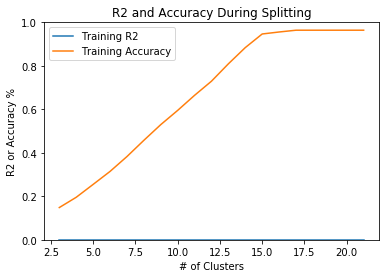

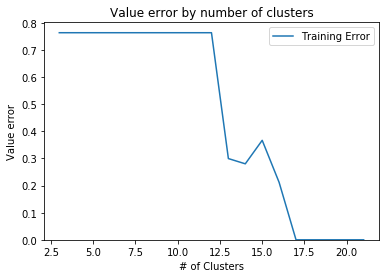

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

N= 90  completed
Clusters Initialized
       ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0       0     0   0.162393  -0.906615      1 -0.004           0        0   
1       0     1   0.014351  -0.929129      2 -0.004           0        0   
2       0     2   1.998613  -0.527212      2 -0.004           1        0   
3       0     3   2.717985  -0.460358      0 -0.004           2        0   
4       0     4   2.685645  -0.723460      2 -0.004           2        0   
...   ...   ...        ...        ...    ...    ...         ...      ...   
2541  109    20   1.784951  -4.069253      2 -0.004          21        0   
2542  109    21   2.933951  -4.037206      2 -0.004          22        0   
2543  109    22   3.689773  -4.625465      2 -0.004          23        0   
2544  109    23   3.350724  -4.520138      0 -0.004          23        0   
2545  109    24   3.605778  -3.874473      2 -0.004          18        0   

     NEXT_CLUSTER  
0               0  
1        

Splitting... |#Clusters:16:  74%|███████▎  | 14/19 [00:27<00:10,  2.13s/it]

Splitting... |#Clusters:17:  79%|███████▉  | 15/19 [00:30<00:08,  2.23s/it]

Splitting... |#Clusters:18:  84%|████████▍ | 16/19 [00:32<00:07,  2.36s/it]

Splitting... |#Clusters:19:  89%|████████▉ | 17/19 [00:35<00:04,  2.42s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:38<00:02,  2.71s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:42<00:02,  2.36s/it]

Optimal # of clusters reached


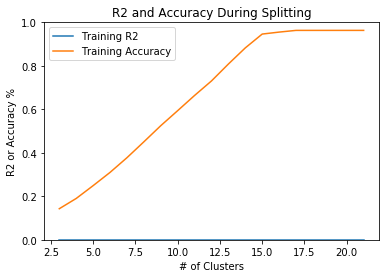

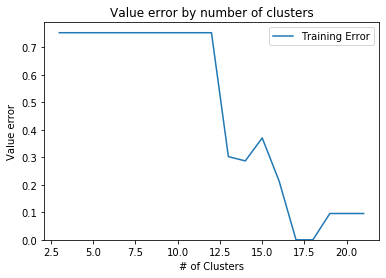

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

N= 110  completed
Clusters Initialized
       ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0       0     0   0.162393  -0.906615      1 -0.004           0        0   
1       0     1   0.014351  -0.929129      2 -0.004           0        0   
2       0     2   1.998613  -0.527212      2 -0.004           1        0   
3       0     3   2.717985  -0.460358      0 -0.004           2        0   
4       0     4   2.685645  -0.723460      2 -0.004           2        0   
...   ...   ...        ...        ...    ...    ...         ...      ...   
2988  129    20   3.844226  -2.201959      1 -0.004          13        0   
2989  129    21   3.825934  -3.612849      3 -0.004          18        0   
2990  129    22   3.809666  -3.373042      0 -0.004          18        0   
2991  129    23   3.650576  -2.965918      0 -0.004          13        0   
2992  129    24   3.804994  -1.849149      2 -0.004           8        0   

     NEXT_CLUSTER  
0               0  
1       

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:46<00:02,  2.60s/it]

Optimal # of clusters reached


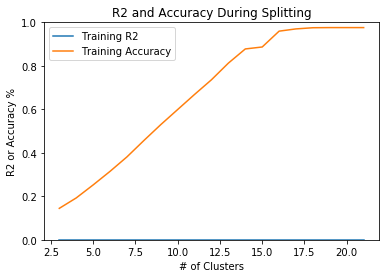

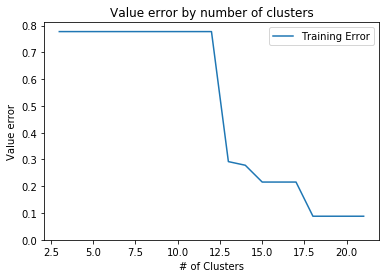

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


N= 130  completed


Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

Clusters Initialized
       ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0       0     0   0.162393  -0.906615      1 -0.004           0        0   
1       0     1   0.014351  -0.929129      2 -0.004           0        0   
2       0     2   1.998613  -0.527212      2 -0.004           1        0   
3       0     3   2.717985  -0.460358      0 -0.004           2        0   
4       0     4   2.685645  -0.723460      2 -0.004           2        0   
...   ...   ...        ...        ...    ...    ...         ...      ...   
3445  149    20   3.252708  -3.159847      0 -0.004          18        0   
3446  149    21   3.857828  -2.663728      0 -0.004          13        0   
3447  149    22   3.299073  -1.593772      2 -0.004           8        0   
3448  149    23   4.153727  -1.280896      1 -0.004           9        0   
3449  149    24   4.209802  -2.137028      0 -0.004          14        0   

     NEXT_CLUSTER  
0               0  
1               0  
2     

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:55<00:03,  3.10s/it]

Optimal # of clusters reached


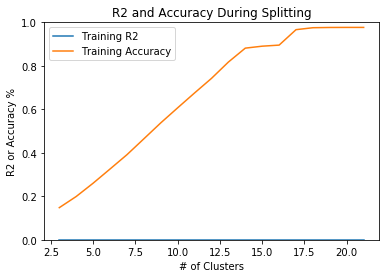

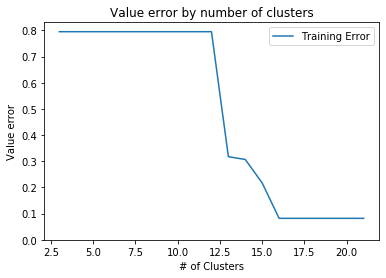

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


N= 150  completed


Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

Clusters Initialized
       ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0       0     0   0.162393  -0.906615      1 -0.004           0        0   
1       0     1   0.014351  -0.929129      2 -0.004           0        0   
2       0     2   1.998613  -0.527212      2 -0.004           1        0   
3       0     3   2.717985  -0.460358      0 -0.004           2        0   
4       0     4   2.685645  -0.723460      2 -0.004           2        0   
...   ...   ...        ...        ...    ...    ...         ...      ...   
3892  169    20   3.479330  -2.473305      1 -0.004          13        0   
3893  169    21   3.967572  -3.467254      0 -0.004          18        0   
3894  169    22   3.846009  -2.576515      1 -0.004          13        0   
3895  169    23   3.846428  -3.333680      0 -0.004          18        0   
3896  169    24   3.554606  -2.475583      0 -0.004          13        0   

     NEXT_CLUSTER  
0               0  
1               0  
2     

Splitting... |#Clusters:18:  84%|████████▍ | 16/19 [01:00<00:11,  3.70s/it]

Splitting... |#Clusters:19:  89%|████████▉ | 17/19 [01:04<00:07,  3.61s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [01:07<00:03,  3.57s/it]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [01:11<00:03,  3.96s/it]

Optimal # of clusters reached


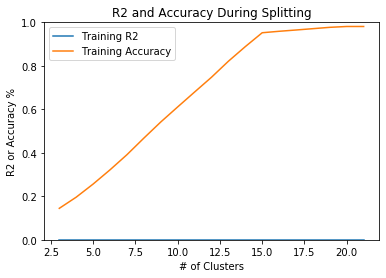

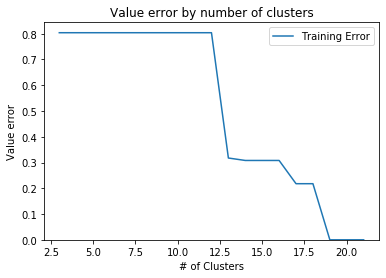

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


N= 170  completed


Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

Clusters Initialized
       ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0       0     0   0.162393  -0.906615      1 -0.004           0        0   
1       0     1   0.014351  -0.929129      2 -0.004           0        0   
2       0     2   1.998613  -0.527212      2 -0.004           1        0   
3       0     3   2.717985  -0.460358      0 -0.004           2        0   
4       0     4   2.685645  -0.723460      2 -0.004           2        0   
...   ...   ...        ...        ...    ...    ...         ...      ...   
4596  199    20   3.827982  -1.149078      2 -0.004           8        0   
4597  199    21   4.467706  -1.203635      0 -0.004           9        0   
4598  199    22   4.176818  -0.214303      1 -0.004           4        0   
4599  199    23   4.617432  -1.512775      3 -0.004           9        0   
4600  199    24   3.646019  -1.625263      2 -0.004           8        0   

     NEXT_CLUSTER  
0               0  
1               0  
2     

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [01:16<00:04,  4.24s/it]

Optimal # of clusters reached


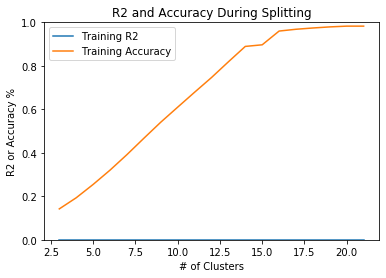

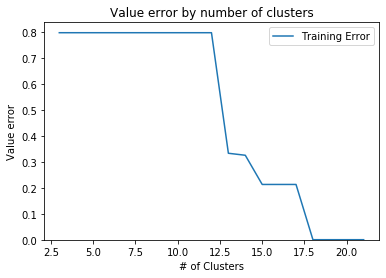

N= 200  completed


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [6]:
# Setting parameters for model fitting
max_k = 21
classification = 'DecisionTreeClassifier'
split_classifier_params = {'random_state':0, 'max_depth':2}
clustering = 'Agglomerative'
n_clusters = None
distance_threshold = 0.5
random_state = 0
pfeatures = 2
gamma = 1
actions = [0, 1, 2, 3]
h = -1
cv = 5
th = 0

Ns = [10, 20, 30, 40, 50, 70, 90, 110, 130, 150, 170, 200]
#Ns = [20, 50, 90]
df_full = df.copy()

models=[]
    
# Training models and fitted Q! 
for n in Ns:
    df_small = df_full.loc[df_full['ID']<n]

    m = MDP_model()
    m.fit(df_small, # df: dataframe in the format ['ID', 'TIME', ...features..., 'RISK', 'ACTION']
        pfeatures, # int: number of features
        h, # int: time horizon (# of actions we want to optimize)
        gamma, # discount factor
        max_k, # int: number of iterations
        distance_threshold, # clustering diameter for Agglomerative clustering
        cv, # number for cross validation
        th, # splitting threshold
        classification, # classification method
        split_classifier_params, # classification params
        clustering,# clustering method from Agglomerative, KMeans, and Birch
        n_clusters, # number of clusters for KMeans
        random_state,
        plot=True,
        optimize=False)
    print('N=', n, ' completed')
    models.append(m)

## Errors

pygame 2.0.0.dev10 (SDL 2.0.12, python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


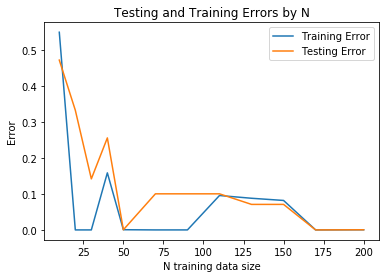

In [7]:
# Creating a test set with same parameters as training set
df_test = createSamples(N, T_max, maze, r, reseed=True)

# In & out sample training and testing value errors: 
training_errors = []
testing_errors = []
for m in models: 
    tr_err = m.training_error.loc[m.training_error['Clusters']==m.opt_k]['Error'].min()
    te_err = testing_value_error(df_test, m.df_trained, m.m, m.pfeatures, gamma, relative=False, h=-1)
    training_errors.append(tr_err)
    testing_errors.append(te_err)

fig1, ax1 = plt.subplots()
ax1.plot(Ns, training_errors, label='Training Error')
ax1.plot(Ns, testing_errors, label='Testing Error')
ax1.set_title('Testing and Training Errors by N')
ax1.set_xlabel('N training data size')
ax1.set_ylabel('Error')
ax1.legend()

In [8]:
models[-2].training_error

,Clusters,Error
0,3,8.039379e-01
1,4,8.039379e-01
2,5,8.039379e-01
3,6,8.039379e-01
4,7,8.039379e-01
5,8,8.039379e-01
6,9,8.039379e-01
7,10,8.039379e-01
8,11,8.039379e-01
9,12,8.039379e-01


Here is a metric that measures how good our classification model is in putting points in the right cluster:

In [9]:
m.clus_pred_accuracy

0.9880460769397957

Going through each point in the training data set, here is how many (by percentage) our optimal policy actually returned the correct action for. This is essentially the training accuracy:

In [10]:
# in sample policy accuracy (comparing model suggestion to true optimal)
policy_accuracy(m, maze, m.df_trained)

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.24354046e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  1.97918642e-01  3.62917309e-01  2.53726718e-01
  1.97918642e-01  6.42344000e-01  2.24354046e-01  1.97918642e-01
  5.74109600e-01  8.31806849e-13 -1.00000000e+03]
Optimal Policy: [2 0 1 1 1 2 0 0 0 2 1 1 1 2 2 1 0 1 2 2 0 0 0]
Optimal Value: [7.04370331e-01 7.22826868e-01 7.41660069e-01 8.84704957e-01
 9.06841793e-01 6.51186120e-01 7.04370331e-01 7.60877622e-01
 9.06841793e-01 9.29430401e-01 6.68557266e-01 6.86282924e-01
 7.80487369e-01 8.84704957e-01 9.52480001e-01 7.60877622e-01
 7.80487369e-01 8.00497316e-01 8.63010858e-01 9.76000001e-01
 7.41660069e-01 8.00497316e-01 8.20915628e-01 8.41750641e-01
 1.00000000e+00 9.55885364e-10]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]


0.9926103021082373

In [11]:
# out of sample policy accuracy (comparing model suggestion to true optimal)
policy_accuracy(m, maze, df_test)

Optimal Value: [7.04370331e-01 7.22826868e-01 7.41660069e-01 8.84704957e-01
 9.06841793e-01 6.51186120e-01 7.04370331e-01 7.60877622e-01
 9.06841793e-01 9.29430401e-01 6.68557266e-01 6.86282924e-01
 7.80487369e-01 8.84704957e-01 9.52480001e-01 7.60877622e-01
 7.80487369e-01 8.00497316e-01 8.63010858e-01 9.76000001e-01
 7.41660069e-01 8.00497316e-01 8.20915628e-01 8.41750641e-01
 1.00000000e+00 9.55885364e-10]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]


0.9891879964695499

## Accuracies

Make graphs putting training & testing together; testing dataset random each time. 

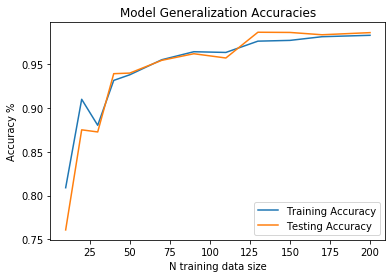

In [12]:
# Generalization Accuracies (training & testing)
from testing import generalization_accuracy

tr_acc, test_acc = generalization_accuracy(models, df_test, Ns)

## Optimality Gap

Optimal Value: [1.97918642e-01 2.24354046e-01 2.53726718e-01 5.74109600e-01
 6.42344000e-01 1.33442690e-01 1.97918642e-01 2.86363020e-01
 6.42344000e-01 7.18160000e-01 1.52714100e-01 1.74126778e-01
 3.22625578e-01 5.74109600e-01 8.02400000e-01 2.86363020e-01
 3.22625578e-01 3.62917309e-01 5.12698640e-01 8.96000000e-01
 2.53726718e-01 3.62917309e-01 4.07685899e-01 4.57428776e-01
 1.00000000e+00 1.61397581e-10]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]
Round N= 10
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [-4.00000000e-02  1.00000000e+00  8.96000000e-01  4.57428776e-01
 -9.00004000e+02 -9.00004000e+02 -8.10007600e+02  7.18160000e-01
 -9.00004000e+02 -9.00004000e+02 -4.00000000e-02 -9.00004000e+02
 -9.00004000e+02 -9.00004000e+02  8.02400000e-01  5.12698640e-01
  5.74109600e-01  6.42344000e-01 -9.00004000e+02 -9.00004000e+02
 -9.00004000e+02  2.34926823e-13 -1.00000000e+03]
Optimal Policy: [2 0 1 0 0 0 1 1 0 0 2 0 0 0 1 0 0 2 0 0 0 0 0]
Round N= 20
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  2.24354046e-01  1.97918642e-01 -9.00004000e+02
 -9.00004000e+02 -9.00004000e+02 -9.00004000e+02  2.53726718e-01
  2.24354046e-01  3.97850637e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 2 2 0 0 0 0 1 2 0 0]
Round N= 30
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01 -9.00004000e+02  3.62917309e-01  2.24354046e-01
 -9.00004000e+02 -9.00004000e+02 -9.00004000e+02 -9.00004000e+02
 -9.00004000e+02  3.22259016e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 0 2 2 0 0 0 0 0 0 0]
Round N= 40
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  2.24354046e-01  3.62917309e-01  2.53726718e-01
  2.86363020e-01 -8.10007600e+02  2.53726718e-01 -4.00000000e-02
 -9.00004000e+02  4.91173626e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 2 2 1 1 2 1 1 0 0 0]
Round N= 50
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  2.24354046e-01  1.97918642e-01  1.97918642e-01
  2.24354046e-01  1.97918642e-01 -4.00000000e-02  6.42344000e-01
 -9.00004000e+02  6.06387193e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 2 2 0 2 2 1 1 0 0 0]
Round N= 70
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.86363020e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  3.22625578e-01  2.53726718e-01  3.62917309e-01
  6.42344000e-01  2.53726718e-01  2.86363020e-01  2.53726718e-01
  2.24354046e-01  8.31806849e-13 -1.00000000e+03]
Optimal Policy: [3 0 1 1 1 2 0 0 0 2 1 1 1 1 0 2 1 2 2 0 2 0 0]
Round N= 90
resolved model
Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  3.22625578e-01  2.53726718e-01  3.62917309e-01
  6.42344000e-01  2.24354046e-01  2.86363020e-01  2.53726718e-01
  2.24354046e-01  8.31806849e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 1 0 2 1 2 2 1 2 0 0]


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Round N= 110
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  2.24354046e-01  1.97918642e-01  3.62917309e-01
  6.42344000e-01  2.24354046e-01  1.97918642e-01  2.53726718e-01
  3.22625578e-01  8.31806849e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 2 2 2 1 2 2 1 1 0 0]
Round N= 130
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  1.97918642e-01  3.62917309e-01  2.24354046e-01
  1.97918642e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
 -9.00004000e+02  6.06387193e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 2 2 2 0 1 0 0 0 0 0]
Round N= 150
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  1.97918642e-01  3.62917309e-01  6.42344000e-01
  2.24354046e-01  1.97918642e-01  5.74109600e-01  5.12698640e-01
 -9.00004000e+02  6.06387193e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 2 2 1 2 0 0 0 0 0 0]
Round N= 170
resolved model


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  2.24354046e-01  2.53726718e-01  2.86363020e-01
  3.62917309e-01  2.24354046e-01  6.42344000e-01  1.97918642e-01
 -9.00004000e+02  6.06387193e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 2 1 1 2 2 1 2 0 0 0]
Round N= 200


Text(0, 0.5, '|V_alg-V*|')

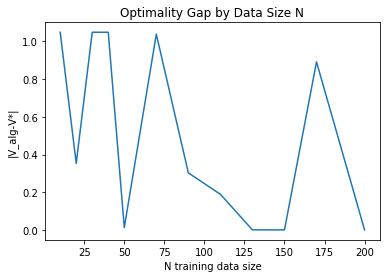

In [13]:
# Set Parameters
P, R = get_maze_MDP(maze)
K = 100
f, rw = get_maze_transition_reward(maze)

opt_gap = value_diff(models, Ns, K, T_max, P, R, f, rw)
fig1, ax1 = plt.subplots()
ax1.plot(Ns, opt_gap)
ax1.set_title('Optimality Gap by Data Size N')
ax1.set_xlabel('N training data size')
ax1.set_ylabel('|V_alg-V*|')

#### Observing Policies

First, let's see what the clustering that the model found actually looks like!

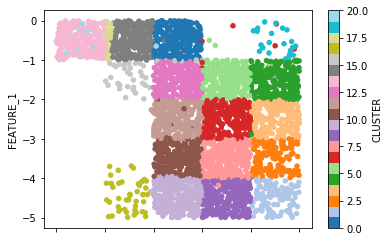

In [20]:
plot_features(models[-2].df_trained, 'FEATURE_0', 'FEATURE_1', 'CLUSTER')

And compare it with a clustering with the actual cells of the Maze.

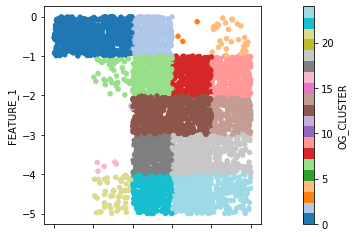

In [15]:
plot_features(m.df_trained, 'FEATURE_0', 'FEATURE_1', 'OG_CLUSTER')

In [16]:
def plot_features(df, x, y, c='CLUSTER'):
    df.plot.scatter(x=x,
                      y=y,
                      c=c,
                      colormap='tab20')
#    import seaborn as sns
#    sns.pairplot(x_vars=["FEATURE_1"], y_vars=["FEATURE_2"], data=df, hue="OG_CLUSTER", height=5)
    plt.show()

Now, let's see what the optimal policy our model learns is:

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:330: RuntimeWarning: invalid value encountered in less_equal
  beta))<=alpha]
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/model.py:360: RuntimeWarning: invalid value encountered in greater
  beta))>alpha]


Optimal Value: [ 2.53726718e-01  1.00000000e+00  8.96000000e-01  8.02400000e-01
  7.18160000e-01  6.42344000e-01  5.74109600e-01  5.12698640e-01
  4.57428776e-01  4.07685898e-01  3.62917309e-01  3.22625578e-01
  2.86363020e-01  2.24354046e-01  2.53726718e-01  2.86363020e-01
  3.62917309e-01  2.24354046e-01  6.42344000e-01  1.97918642e-01
  2.53726718e-01  8.31806849e-13 -1.00000000e+03]
Optimal Policy: [1 0 1 1 1 2 0 0 0 2 1 1 1 2 1 1 2 0 1 2 1 0 0]


/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Maze/maze_functions.py:160: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")


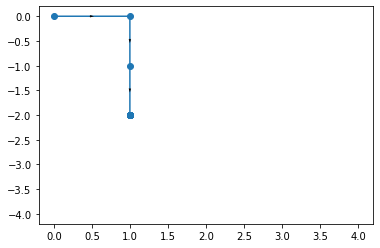

(array([0., 1., 1., ..., 1., 1., 1.]),
 array([-0.,  0., -1., ..., -2., -2., -2.]))

In [25]:
opt_model_trajectory(models[-2], maze, alpha=0.2)

And here is an actual simulation of a point through the maze by taking the found optimal policy. Note that we have set a sink node as the bottom left corner, which is where the path will go once it has reached the goal state.

states [[array([13]), 2], [array([0]), 1], [array([16]), 1], [array([11]), 1], [array([10]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1], [array([11]), 1]]


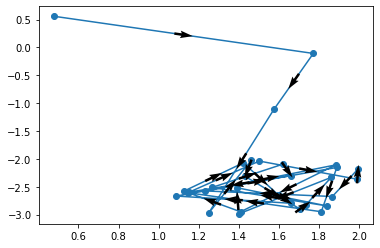

(array([0.47700847, 1.7707275 , 1.57415808, 1.24932506, 1.46149591,
        1.43011204, 1.7041899 , 1.73269788, 1.86027134, 1.39874267,
        1.38872588, 1.83921452, 1.26583191, 1.61985763, 1.66037365,
        1.15214011, 1.50109641, 1.99001479, 1.99406782, 1.8652665 ,
        1.22889153, 1.88227531, 1.40791561, 1.12546645, 1.42187361,
        1.59677324, 1.6584904 , 1.08694597, 1.88786675, 1.81013337,
        1.14740205]),
 array([ 0.56048474, -0.10687218, -1.11115417, -2.96937764, -2.02433144,
        -2.31318633, -2.8990834 , -2.82545807, -2.33045552, -2.98680489,
        -2.51596764, -2.84357119, -2.51169239, -2.09323696, -2.29947051,
        -2.59564888, -2.03864115, -2.36457556, -2.17921927, -2.67426826,
        -2.57379311, -2.10734264, -2.94814962, -2.57810539, -2.06985266,
        -2.64957956, -2.7955911 , -2.66600495, -2.15289048, -2.94765516,
        -2.60681233]))

In [18]:
f, rw = get_maze_transition_reward(maze)
x0= np.random.rand(2)
m.opt_model_trajectory(x0, f)

And finally, here is the optimal policy for reference:

Optimal Value: [7.04370331e-01 7.22826868e-01 7.41660069e-01 8.84704957e-01
 9.06841793e-01 6.51186120e-01 7.04370331e-01 7.60877622e-01
 9.06841793e-01 9.29430401e-01 6.68557266e-01 6.86282924e-01
 7.80487369e-01 8.84704957e-01 9.52480001e-01 7.60877622e-01
 7.80487369e-01 8.00497316e-01 8.63010858e-01 9.76000001e-01
 7.41660069e-01 8.00497316e-01 8.20915628e-01 8.41750641e-01
 1.00000000e+00 9.55885364e-10]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]


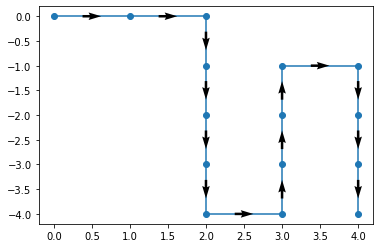

(array([0., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4.]),
 array([-0.,  0.,  0., -1., -2., -3., -4., -4., -3., -2., -1., -1., -2.,
        -3., -4.]))

In [19]:
opt_maze_trajectory(maze)

## Saving Relevant Models

In [29]:
# import pickle
# rd = '5'
# for i in range(len(Ns)):
#     x = Ns[i]
#     pickle.dump(models[i], open(f'round_{rd}_model_N={x}.sav', 'wb'))